In [2]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
%matplotlib inline

In [16]:
path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

In [17]:
shop_info.head()

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
1,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点,...,202,243,216,255,172,226,257,251,281,180
2,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN,...,155,143,78,82,97,83,96,96,115,80
3,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶,...,127,125,47,80,61,68,103,102,104,67
4,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN,...,211,221,81,90,104,55,110,215,196,115
5,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果,...,161,240,454,302,1,0,215,203,291,239


In [7]:
shop_info.describe()

/Users/wakemeup/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,shop_id,location_id,per_pay,score,comment_cnt,shop_level,2015-07-01,2015-07-02,2015-07-03,2015-07-04,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
count,2000.000000,2000.000000,2000.000000,1709.000000,1709.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,583.083000,10.479000,2.677004,3.130486,0.814500,0.360500,0.788500,1.042000,1.057500,...,153.428000,164.777500,138.884000,137.993000,132.673000,139.027500,150.398500,160.960000,158.536500,135.374000
std,577.494589,335.763357,5.762479,1.024211,3.499072,0.855836,3.652288,6.048393,8.154906,8.261496,...,174.548874,196.255033,138.370961,140.894274,129.347116,139.395011,145.420557,180.559462,184.322609,135.053737
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,287.750000,5.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,75.000000,78.000000,66.000000,67.000000,62.000000,68.000000,75.000000,79.000000,77.000000,65.000000
50%,1000.500000,577.500000,10.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,116.000000,100.000000,100.500000,97.000000,100.000000,110.000000,117.000000,112.500000,99.000000
75%,1500.250000,877.250000,15.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,...,171.000000,182.000000,160.000000,158.000000,151.000000,158.000000,173.000000,183.000000,177.000000,156.000000
max,2000.000000,1159.000000,20.000000,4.000000,20.000000,2.000000,85.000000,89.000000,154.000000,154.000000,...,3560.000000,3944.000000,2062.000000,2577.000000,1912.000000,1978.000000,2078.000000,3687.000000,3841.000000,1973.000000


In [10]:
shop_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 499 entries, shop_id to 2016-10-31
dtypes: float64(2), int64(493), object(4)
memory usage: 7.6+ MB


In [45]:
pd.to_datetime('2015-07-01').date().strftime("%Y-%m-%d")

'2015-07-01'

In [55]:
pd.to_datetime('2015-07-01').strftime("%Y-%m-%d")

'2015-07-01'

In [54]:
pd.to_datetime('2015-07-01').date()

datetime.date(2015, 7, 1)

In [9]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

In [66]:
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31'):
    plt.figure(figsize=(16,9))
    shop_info.loc[id,start_date:end_date].plot()

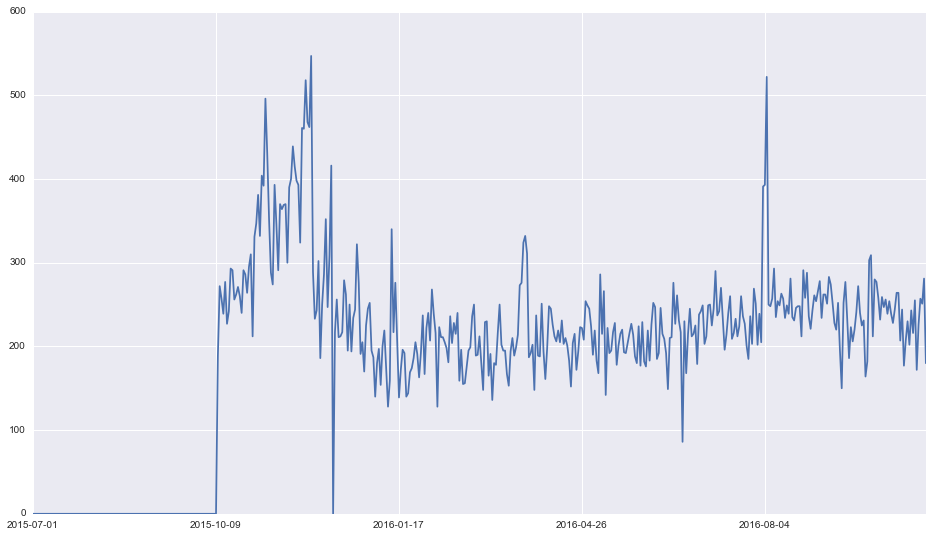

In [162]:
draw_id(1)

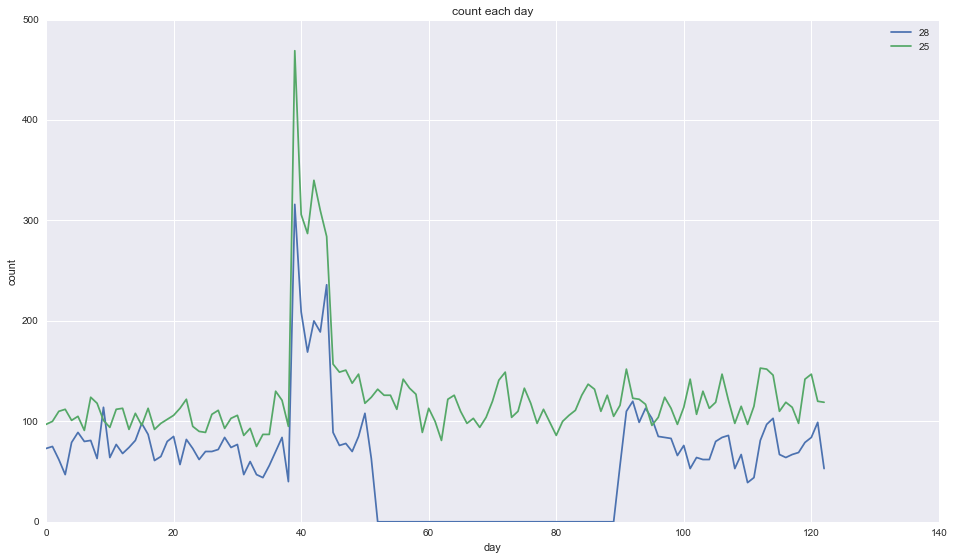

In [116]:
def draw_ids(ids,start_date='2015-07-01',end_date='2016-10-31'):
    plt.figure(figsize=(16,9))
   
    for id in ids:
        plt.plot(shop_info.loc[id,start_date:end_date].tolist(),label = str(id))
    plt.xlabel('day')
    plt.ylabel('count')
    plt.title('count each day')
    plt.legend()
draw_ids([28,25])

In [112]:
shop_info.loc[[35,32]]

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
35,35,东莞,296,18,2.0,0.0,0,超市便利店,超市,NaN,...,219,206,98,141,113,547,103,153,193,109
32,32,杭州,789,2,4.0,0.0,1,超市便利店,便利店,NaN,...,179,104,427,392,454,449,417,181,86,440


In [118]:
shop_info['cate_3_name'].value_counts()

西式快餐        405
中式快餐        220
生鲜水果        111
奶茶           92
其它小吃         87
面包           71
饮品/甜点        67
面点           50
蛋糕           39
零食           22
其它地方菜        20
西餐           19
其它休闲食品       16
日韩料理         15
米粉/米线        15
其它快餐         14
江浙菜          13
川味/重庆火锅      13
川菜           13
其它烘焙糕点       12
粤菜           12
其它火锅         11
冰激凌          10
麻辣烫/串串香       9
中式烧烤          8
其他餐饮美食        7
咖啡            6
西北菜           6
熟食            4
砂锅/煲类/炖菜      4
东北菜           3
海鲜            3
自助餐           3
粥             3
台湾菜           2
湖北菜           2
咖啡厅           2
其它烧烤          1
湘菜            1
闽菜            1
香锅/烤鱼         1
上海本帮菜         1
美食特产          1
Name: cate_3_name, dtype: int64

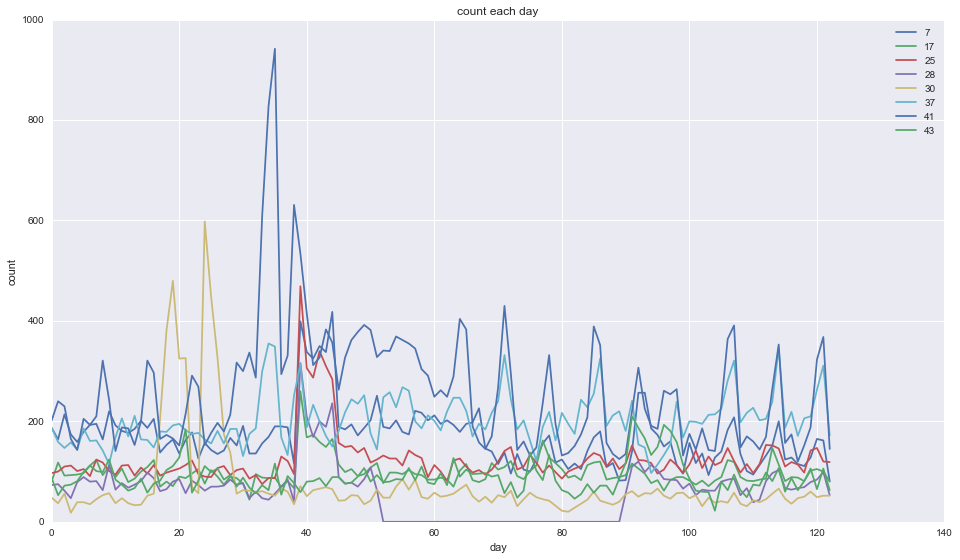

In [120]:
ids = shop_info[shop_info['cate_3_name']=='西式快餐'].index.tolist()
draw_ids(ids[:8])

In [63]:
start_week = pd.to_datetime('2015-07-01').week #27
pd.to_datetime('2016-10-31').week #44

4

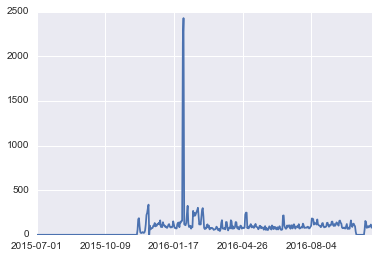

In [24]:
start_week = pd.to_datetime('2015-07-01').week
def draw_id_and_week(x,week):
    plt.figure(figsize=(16,9))
    
    shop_info.loc[x,'2015-07-01':'2016-10-31'].plot()


In [148]:
def cal_total_count_avg_the_whole_time(x):
    start_day = ''
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0:
            start_day = day
            print start_day
            break
 
    return float(shop_info.loc[1]['2015-07-01':'2016-10-31'].sum()) /  len(shop_info.loc[1][start_day:'2016-10-31'])
            
def get_total_count_avg_the_whole_time():
    shop_info['total_count_avg'] = shop_info.apply(lambda x: cal_total_count_avg_the_whole_time(x),axis=1)
get_total_count_avg_the_whole_time()

2015-10-10
2015-11-25
2016-06-18
2016-07-19
2015-09-28
2016-01-22
2015-07-02
2016-08-01
2015-10-30
2016-07-01
2015-08-25
2016-02-02
2016-03-30
2015-08-17
2016-07-13
2015-07-02
2015-07-13
2016-08-04
2015-10-10
2016-04-01
2016-01-12
2015-08-19
2015-11-13
2016-02-19
2015-07-13
2015-10-10
2015-09-30
2015-07-16
2015-11-29
2016-03-04
2016-07-19
2015-11-18
2016-08-04
2016-01-16
2015-11-13
2015-11-17
2015-09-23
2015-11-16
2015-07-16
2016-06-19
2015-09-23
2016-05-02
2016-03-03
2016-02-24
2016-08-02
2015-11-18
2016-07-11
2016-07-28
2015-11-11
2016-07-24
2015-07-30
2016-02-29
2016-06-17
2015-11-21
2016-01-29
2015-07-13
2015-09-24
2015-10-30
2016-06-17
2015-10-02
2016-05-12
2015-07-07
2016-06-03
2015-09-29
2015-11-20
2015-11-16
2016-03-27
2016-07-18
2016-04-27
2016-07-01
2016-01-31
2015-11-19
2016-08-06
2016-01-22
2016-03-26
2016-03-07
2016-05-23
2016-05-04
2015-08-31
2016-05-29
2015-11-11
2015-07-10
2015-07-06
2016-02-20
2015-07-08
2015-10-22
2015-11-16
2015-07-01
2015-11-13
2015-07-06
2016-07-05

In [155]:
shop_info['total_count_avg']

1        238.889175
2        271.020468
3        681.536765
4        882.752381
5        231.722500
6        326.369718
7        189.936475
8       1007.489130
9        251.872283
10       753.569106
11       213.569124
12       339.520147
13       429.115741
14       209.703620
15       835.036036
16       189.936475
17       194.316562
18      1041.449438
19       238.889175
20       433.126168
21       315.268707
22       210.656818
23       261.833333
24       362.066406
25       194.316562
26       238.889175
27       232.886935
28       195.546414
29       274.227811
30       383.012397
           ...     
1971     275.860119
1972     254.640110
1973     267.887283
1974     269.444767
1975     193.102083
1976     222.275779
1977     193.102083
1978     435.159624
1979     586.639241
1980     246.513298
1981     441.376190
1982     712.992308
1983     657.368794
1984     630.537415
1985     189.548057
1986     191.902692
1987     229.428218
1988     282.588415
1989     271.020468


In [167]:
for day_number in range(1,15): #1～14
    predict_day_col = 'predict_day_'+str(day_number)
    print predict_day_col
    shop_info[predict_day_col] = shop_info['total_count_avg'].apply(lambda x:int(x))

predict_day_1
predict_day_2
predict_day_3
predict_day_4
predict_day_5
predict_day_6
predict_day_7
predict_day_8
predict_day_9
predict_day_10
predict_day_11
predict_day_12
predict_day_13
predict_day_14


In [ ]:
day = dateRange('2015-07-01','2016-10-31')
